In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', None)


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [116]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [117]:
df_train = pd.read_csv("../data/palabras.csv")

## Pre-processing

In [118]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
X_train_submit = X_train.copy()

In [120]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)
BE = ce.BinaryEncoder( handle_unknown='ignore')
TE = ce.TargetEncoder( handle_unknown='ignore')

In [121]:
X_train[ ft.getTargetCols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTargetCols() ] = X_test[ft.getAllCols()]


0.373424128

In [101]:
X_train['fecha'] = (pd.to_datetime(df_train['fecha'], errors='coerce').values.astype(int) / 10**9)[0]
X_train = ft.preprocess(X_train, OHE, BE, 'train',TE,y_train)
X_test['fecha'] = (pd.to_datetime(df_train['fecha'], errors='coerce').values.astype(int) / 10**9)[0]
X_test = ft.preprocess(X_test, OHE, BE, 'test',TE,y_train)


--- 5.459811210632324 seconds ---
--- 1.1602513790130615 seconds ---


In [102]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Original shapes: X=(240000, 87) y=(240000,)
Train shapes: X=(180000, 157) y=(180000,)
Test  shapes: X=(60000, 157)  y=(60000,)


In [103]:
X_test

,id,tipodepropiedad_Casa en condominio,tipodepropiedad_Casa,tipodepropiedad_Apartamento,tipodepropiedad_Terreno,tipodepropiedad_Local Comercial,tipodepropiedad_Quinta Vacacional,tipodepropiedad_Bodega comercial,tipodepropiedad_Otros,tipodepropiedad_Oficina comercial,tipodepropiedad_Terreno comercial,tipodepropiedad_Local en centro comercial,tipodepropiedad_Edificio,tipodepropiedad_Duplex,tipodepropiedad_Terreno industrial,tipodepropiedad_Villa,tipodepropiedad_Nave industrial,tipodepropiedad_Casa uso de suelo,tipodepropiedad_Inmuebles productivos urbanos,tipodepropiedad_Departamento Compartido,tipodepropiedad_Rancho,tipodepropiedad_Huerta,tipodepropiedad_nan,tipodepropiedad_Lote,tipodepropiedad_Hospedaje,ciudad_0,ciudad_1,ciudad_2,ciudad_3,ciudad_4,ciudad_5,ciudad_6,ciudad_7,ciudad_8,ciudad_9,ciudad_10,provincia_Quintana Roo,provincia_Sonora,provincia_Distrito Federal,provincia_Edo. de México,provincia_Yucatán,provincia_Jalisco,provincia_Querétaro,provincia_Chihuahua,provincia_San luis Potosí,provincia_Puebla,provincia_Aguascalientes,provincia_Coahuila,provincia_Nuevo León,provincia_Oaxaca,provincia_Veracruz,provincia_Guerrero,provincia_Durango,provincia_Baja California Sur,provincia_Michoacán,provincia_Tamaulipas,provincia_Baja California Norte,provincia_Morelos,provincia_Nayarit,provincia_Hidalgo,provincia_Sinaloa,provincia_Tlaxcala,provincia_Guanajuato,provincia_Chiapas,provincia_Tabasco,provincia_Zacatecas,provincia_Colima,provincia_Campeche,provincia_nan,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,anio,mes,dia,amenities,iluminada,funcional,discreta,inversion,moderno,calentador,hermosa,excelente,mejor,grande,equipada,vestidor,credito,privada,bodega,club,cerrada,jardin,oportunidad,tv,juegos,niño,transporte,estudio,terraza,balcon,lote,fraccionamiento,local,seguridad,garage,centro,techada,estancia,alberca,servicios,servicio,estilo,frente,vista,visitas,parque,areas,estrenar,infonavit,residencial,escuela,exclusivo,lujo,esquina,refaccion,country,barra,lavado,renta,super,lago,bosque,avenida,hospital,pileta,solarium,gas,ciudad_targ,idzona_targ,tipodepropiedad_targ,provincia_targ,metroscubiertostotales,mtotlog,mcublog,m2log
202827,65506,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,3.0,2.0,3.0,348.0,200.0,41566.0,0.373424,0.0,0.0,0.0,0.0,0.0,2013,8,19,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.510083e+06,2.516667e+06,2.401203e+06,1.321376e+06,548.0,5.298317,5.852202,6.306275
151507,15099,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,4.0,2.0,2.0,160.0,100.0,47449.0,0.373424,0.0,0.0,0.0,0.0,0.0,2016,12,3,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.642727e+06,3.866709e+06,2.401203e+06,2.370589e+06,260.0,4.605170,5.075174,5.560682
163248,236537,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,4.0,0.0,4.0,291.0,364.0,55770.0,0.373424,0.0,0.0,0.0,0.0,0.0,2015,2,16,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,3.256906e+06,2.682362e+06,2.766586e+06,2.763384e+06,655.0,5.897154,5.673323,6.484635
157083,252792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [104]:
X_train

,id,tipodepropiedad_Casa en condominio,tipodepropiedad_Casa,tipodepropiedad_Apartamento,tipodepropiedad_Terreno,tipodepropiedad_Local Comercial,tipodepropiedad_Quinta Vacacional,tipodepropiedad_Bodega comercial,tipodepropiedad_Otros,tipodepropiedad_Oficina comercial,tipodepropiedad_Terreno comercial,tipodepropiedad_Local en centro comercial,tipodepropiedad_Edificio,tipodepropiedad_Duplex,tipodepropiedad_Terreno industrial,tipodepropiedad_Villa,tipodepropiedad_Nave industrial,tipodepropiedad_Casa uso de suelo,tipodepropiedad_Inmuebles productivos urbanos,tipodepropiedad_Departamento Compartido,tipodepropiedad_Rancho,tipodepropiedad_Huerta,tipodepropiedad_nan,tipodepropiedad_Lote,tipodepropiedad_Hospedaje,ciudad_0,ciudad_1,ciudad_2,ciudad_3,ciudad_4,ciudad_5,ciudad_6,ciudad_7,ciudad_8,ciudad_9,ciudad_10,provincia_Quintana Roo,provincia_Sonora,provincia_Distrito Federal,provincia_Edo. de México,provincia_Yucatán,provincia_Jalisco,provincia_Querétaro,provincia_Chihuahua,provincia_San luis Potosí,provincia_Puebla,provincia_Aguascalientes,provincia_Coahuila,provincia_Nuevo León,provincia_Oaxaca,provincia_Veracruz,provincia_Guerrero,provincia_Durango,provincia_Baja California Sur,provincia_Michoacán,provincia_Tamaulipas,provincia_Baja California Norte,provincia_Morelos,provincia_Nayarit,provincia_Hidalgo,provincia_Sinaloa,provincia_Tlaxcala,provincia_Guanajuato,provincia_Chiapas,provincia_Tabasco,provincia_Zacatecas,provincia_Colima,provincia_Campeche,provincia_nan,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,anio,mes,dia,amenities,iluminada,funcional,discreta,inversion,moderno,calentador,hermosa,excelente,mejor,grande,equipada,vestidor,credito,privada,bodega,club,cerrada,jardin,oportunidad,tv,juegos,niño,transporte,estudio,terraza,balcon,lote,fraccionamiento,local,seguridad,garage,centro,techada,estancia,alberca,servicios,servicio,estilo,frente,vista,visitas,parque,areas,estrenar,infonavit,residencial,escuela,exclusivo,lujo,esquina,refaccion,country,barra,lavado,renta,super,lago,bosque,avenida,hospital,pileta,solarium,gas,ciudad_targ,idzona_targ,tipodepropiedad_targ,provincia_targ,metroscubiertostotales,mtotlog,mcublog,m2log
122812,298880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.0,2.0,2.0,170.0,160.0,0.0,0.373424,0.0,0.0,0.0,0.0,0.0,2016,4,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.466303e+06,2.271336e+06,2.890044e+06,2.400434e+06,330.0,5.075174,5.135798,5.799093
180398,87355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,2.0,1.0,2.0,140.0,156.0,350390.0,0.373424,0.0,0.0,0.0,1.0,1.0,2016,12,21,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1.273116e+06,2.533125e+06,2.401203e+06,1.460238e+06,296.0,5.049856,4.941642,5.690359
157317,141560,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.0,3.0,1.0,2.0,93.0,93.0,23567.0,0.373424,0.0,0.0,0.0,1.0,1.0,2016,12,12,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.385008e+06,2.984773e+06,2.766586e+06,3.474495e+06,186.0,4.532599,4.532599,5.225747
78425,63104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,3.0,1.0,1.0,113.0,85.0,56868.0,0.373424,0.0,0.0,0.0,0.0,0.0,2016,7,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.418629e+06,9.199138e+05,2.401203e+06,2.763384e+06,198.0,4.442651,4.72

## Feature Selection

In [53]:
#from sklearn.feature_selection import SelectKBest

In [54]:
#selection = SelectKBest(k=40)
#x_features = selection.fit_transform(X_train, y_train)
#columns = np.asarray(X_train.columns.values)
#support = np.asarray(selection.get_support())
#columns_with_support = columns[support]

In [55]:
#columns_with_support

## Training

In [56]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1750,n_jobs=6,objective="reg:squarederror", max_depth= 11,min_child_weight = 1,colsample_bytree=0.5, gamma=1, learning_rate=0.1, subsample=1,)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=1750,
             n_jobs=6, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [57]:
start_time = time.time()
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 708.914666891098 seconds ---


## Predicciones

In [58]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 99.8085%
Testeo: 84.1993%.
Mean abs error: 484523.6281.


In [59]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

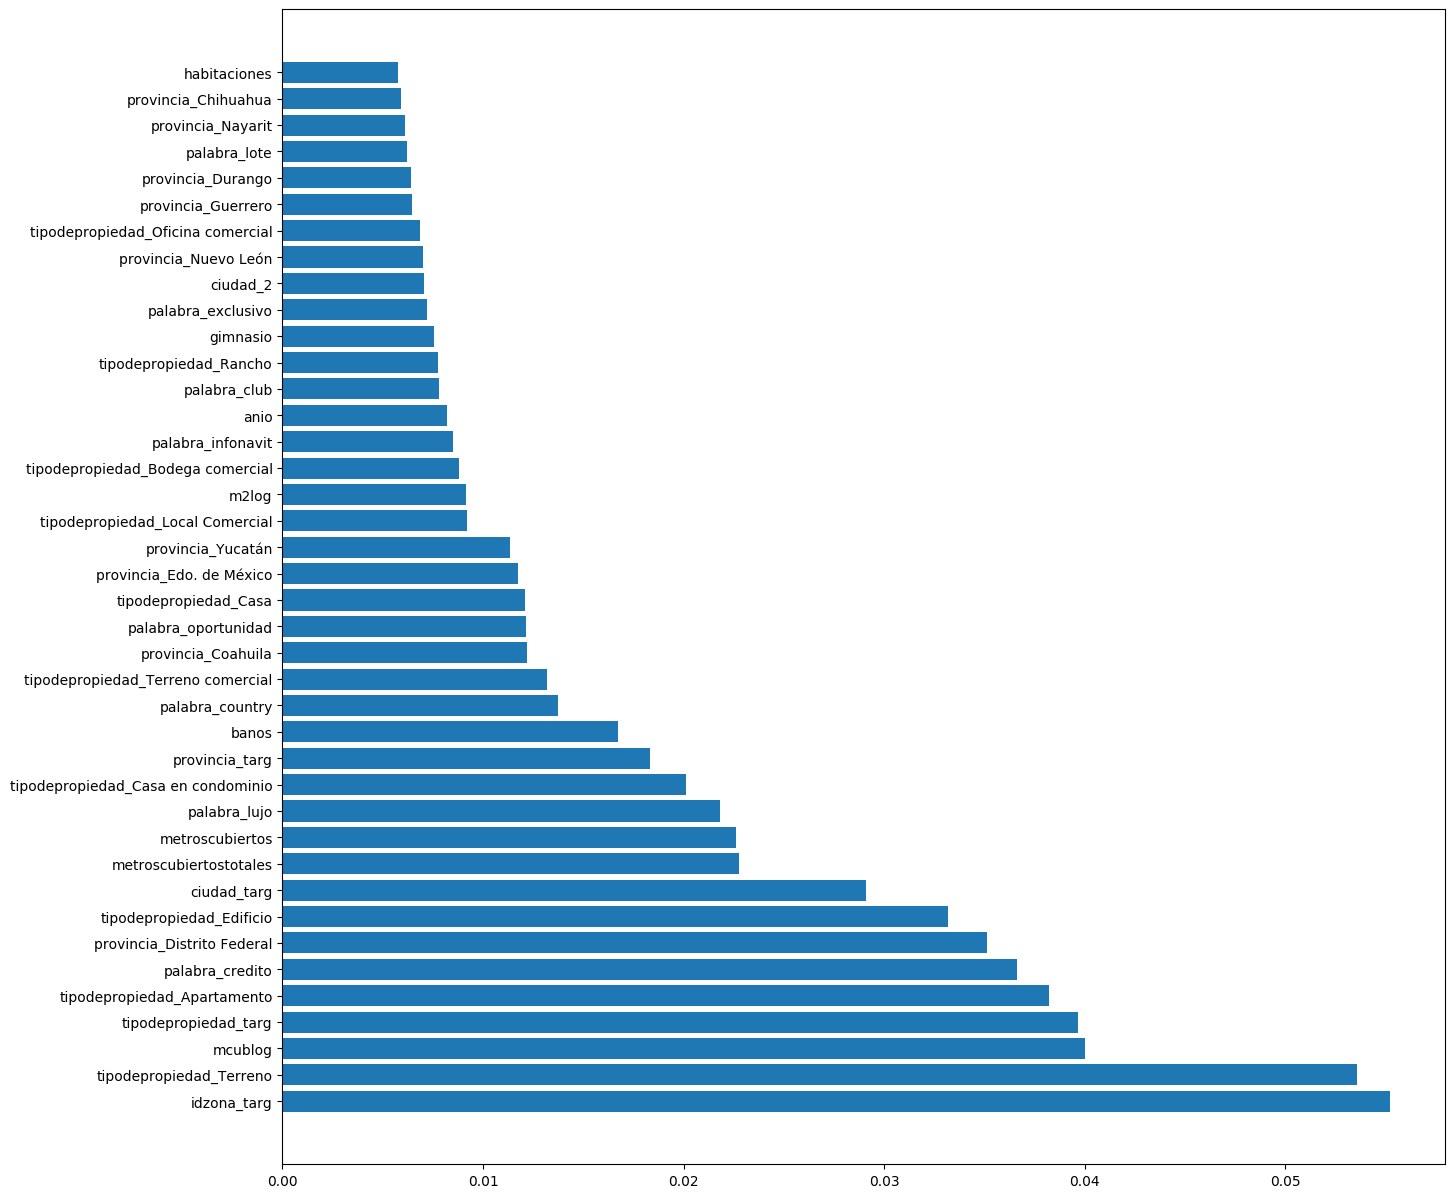

In [16]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)

In [44]:
importancia.x.values

array(['provincia_Distrito Federal', 'tipodepropiedad_Apartamento',
       'tipodepropiedad_Terreno', 'provincia_Yucatán',
       'tipodepropiedad_Casa', 'provincia_Coahuila',
       'tipodepropiedad_Edificio', 'provincia_Durango',
       'tipodepropiedad_Casa en condominio', 'provincia_Chihuahua',
       'metroscubiertostotales', 'provincia_Edo. de México',
       'palabra_credito', 'provincia_Nuevo León', 'metroscubiertos',
       'palabra_country', 'banos', 'palabra_lujo',
       'tipodepropiedad_Bodega comercial',
       'tipodepropiedad_Terreno comercial', 'gimnasio',
       'provincia_Querétaro', 'tipodepropiedad_Rancho', 'ciudad_4',
       'provincia_Jalisco', 'habitaciones',
       'tipodepropiedad_Oficina comercial', 'ciudad_6',
       'palabra_exclusivo', 'metrostotales', 'ciudad_3',
       'palabra_alberca', 'idzona', 'palabra_lote', 'provincia_Tabasco',
       'ciudad_5', 'ciudad_2', 'ciudad_7',
       'tipodepropiedad_Quinta Vacacional', 'provincia_Guerrero'],
      dtype=

 ## Tunning

In [10]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

param_test = {
    'learning_rate':[0.15,0.1,0.05],
    'subsample':[0.7,1],
    'gamma':[1,15,30],
    'colsample_bytree':[0.5,1.0],
}

search = GridSearchCV(
        estimator = XGBRegressor(n_estimators=500, max_depth= 10,min_child_weight = 10,objective="reg:squarederror"), 
        param_grid = param_test,
        n_jobs=3,
        cv=3,
        verbose=10)


In [11]:
search.fit(X_train,y_train)

search.best_params_, search.best_score_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 10.0min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 22.1min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 41.2min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 63.6min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 82.7min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 108.6min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 137.8min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed: 180.1min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 232.7min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed: 305.9min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 372.7min
[Parallel(n_jobs=3)]: Done 108 out of 108 | elapsed: 452.6min finished


({'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'subsample': 1},
 0.8225937523151746)

In [12]:
pd.DataFrame(search.cv_results_).to_csv('../data/GridSearchValues', index=False)

In [13]:
ft.predecir(search,X_train,y_train,X_test,y_test)

Entrenamiento: 94.1920%
Testeo: 83.0452%.
Mean abs error: 520396.0556.


## Submission

In [135]:
#test_ sale del Feature_test.ipynb
df_test = pd.read_csv('../data/test_.csv')

In [123]:
X_train_submit = df_test.copy()

In [124]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)
BE = ce.BinaryEncoder( handle_unknown='ignore')
TE = ce.TargetEncoder( handle_unknown='ignore')

In [125]:
df_test[ ft.getTargetCols() ] = df_test[ft.getAllCols()]

In [126]:
X_train['fecha'] = (pd.to_datetime(df_train['fecha'], errors='coerce').values.astype(int) / 10**9)[0]
X_train = ft.preprocess(X_train, OHE, BE, 'train',TE,y_train)

df_test['fecha'] = (pd.to_datetime(df_test['fecha'], errors='coerce').values.astype(int) / 10**9)[0]
df_test = ft.preprocess(df_test, OHE, BE, 'test',TE)


--- 5.504239559173584 seconds ---
--- 1.0982425212860107 seconds ---


In [129]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1750,n_jobs=6,objective="reg:squarederror", max_depth= 11,min_child_weight = 1,colsample_bytree=0.5, gamma=1, learning_rate=0.1, subsample=1,)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=1750,
             n_jobs=6, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [130]:
start_time = time.time()
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 800.3219730854034 seconds ---


In [132]:
ft.predecir(model, X_train, y_train, X_test, y_test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields titulo, descripcion, tipodepropiedad, direccion, ciudad, provincia, fecha, ciudad_targ, tipodepropiedad_targ, provincia_targ

In [133]:
submit_prediction = model.predict( df_test )

In [134]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'XGB_xx.csv'

output.to_csv('../data/'+nombre_submit, index=False)